In [1]:
%ls -l

total 144
-rw-r--r-- 1 samoht25 users   8249 May  5 09:32 car_caret_testing.ipynb
-rw-r--r-- 1 samoht25 users 131696 May  6 06:30 python_car_testing.ipynb


In [2]:
% cd ..

/home/samoht25/uclax-data-science/05-Car_Acceptability


In [3]:
ls -l

total 292
-rw-r--r-- 1 samoht25  1020 236338 May  5 09:05 Car_Acceptability.ipynb
-rw-r--r-- 1 samoht25  1020  51867 May  4 02:10 car.data.txt
-rw-r--r-- 1 samoht25  1020   3097 May  4 02:10 car.names.txt
drwxr-xr-x 3 samoht25 users   4096 May  6 06:30 Test/


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
feature_names = np.array(['buying_price', 'maint_price', 'no_doors', 'capacity', 'lug_boot', 'safety', 'acc'])
car = pd.read_csv("car.data.txt", names = feature_names)

In [6]:
car.head()

,buying_price,maint_price,no_doors,capacity,lug_boot,safety,acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
car.shape
display(car.buying_price.unique())
display(car.maint_price.unique())
display(car.no_doors.unique())
display(car.capacity.unique())
display(car.lug_boot.unique())
display(car.safety.unique())
display(car.acc.unique())

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['2', '3', '4', '5more'], dtype=object)

array(['2', '4', 'more'], dtype=object)

array(['small', 'med', 'big'], dtype=object)

array(['low', 'med', 'high'], dtype=object)

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
car.buying_price.replace(["vhigh", "high", "med", "low"], [1,2,3,4], inplace = True)
car.maint_price.replace(["vhigh", "high", "med", "low"], [1,2,3,4], inplace = True)
car.no_doors.replace(["2", "3", "4", "5more"], [1,2,3,4], inplace = True)
car.capacity.replace(["2", "4", "more"], [1,2,3], inplace = True)
car.lug_boot.replace(["small", "med", "big"], [1,2,3], inplace = True)
car.safety.replace(["low", "med", "high"], [1,2,3], inplace = True)
#car.acc.replace(["unacc", "acc", "good", "vgood"], [1,2,3,4], inplace = True)

In [9]:
car.describe()

,buying_price,maint_price,no_doors,capacity,lug_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [10]:
features_only = feature_names[0:6]
features_only

array(['buying_price', 'maint_price', 'no_doors', 'capacity', 'lug_boot',
       'safety'], 
      dtype='<U12')

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


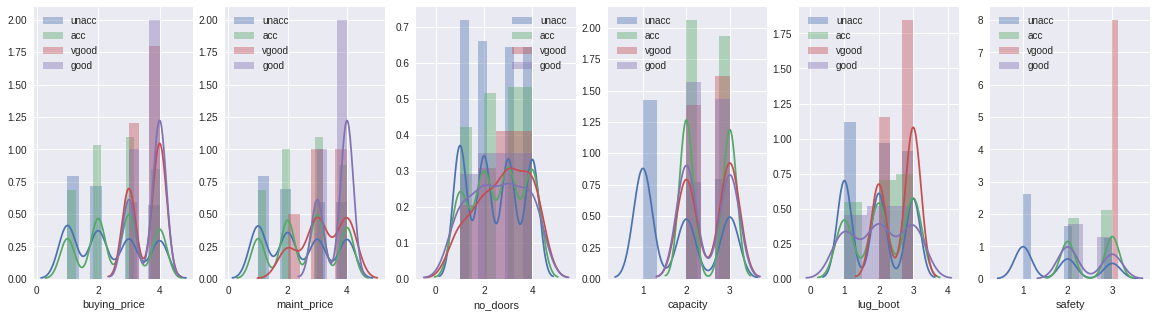

In [11]:
_, ax = plt.subplots(1,6, figsize = (20,5))

for i in range(6):
    for number in car.acc.unique():
        group_mask = (number == car.acc)
        group = car[group_mask]
        sns.distplot(group[features_only[i]], ax=ax[i], label = number)
        ax[i].legend()
        

# KNN Nearest Accuracy

In [12]:
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [149]:
target, feature = dmatrices("acc ~ buying_price + maint_price + no_doors + capacity + lug_boot + safety", data = car)
(feature_train,
 feature_test,
 target_train,
 target_test) = train_test_split(feature, target, random_state = 20)

knn_model = KNeighborsClassifier()
knn_model.fit(feature_train, target_train)
predictions = knn_model.predict(feature_test)

score = accuracy_score(target_test, predictions)
score

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:108: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  return np.average(sample_score, weights=sample_weight)


0.92361111111111116

### KNN Accuracy Score: 0.92

In [14]:
car.acc.replace(["unacc", "acc", "good", "vgood"], [1,2,3,4], inplace = True)
car_numerical = car.drop("acc", axis=1)
car_acc = car["acc"]
feature_RFE = np.array(car_numerical)
target_RFE = np.array(car_acc)

from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select = 6, step=1)
selector = selector.fit(feature_RFE, target_RFE)
selector.ranking_

array([1, 1, 1, 1, 1, 1])

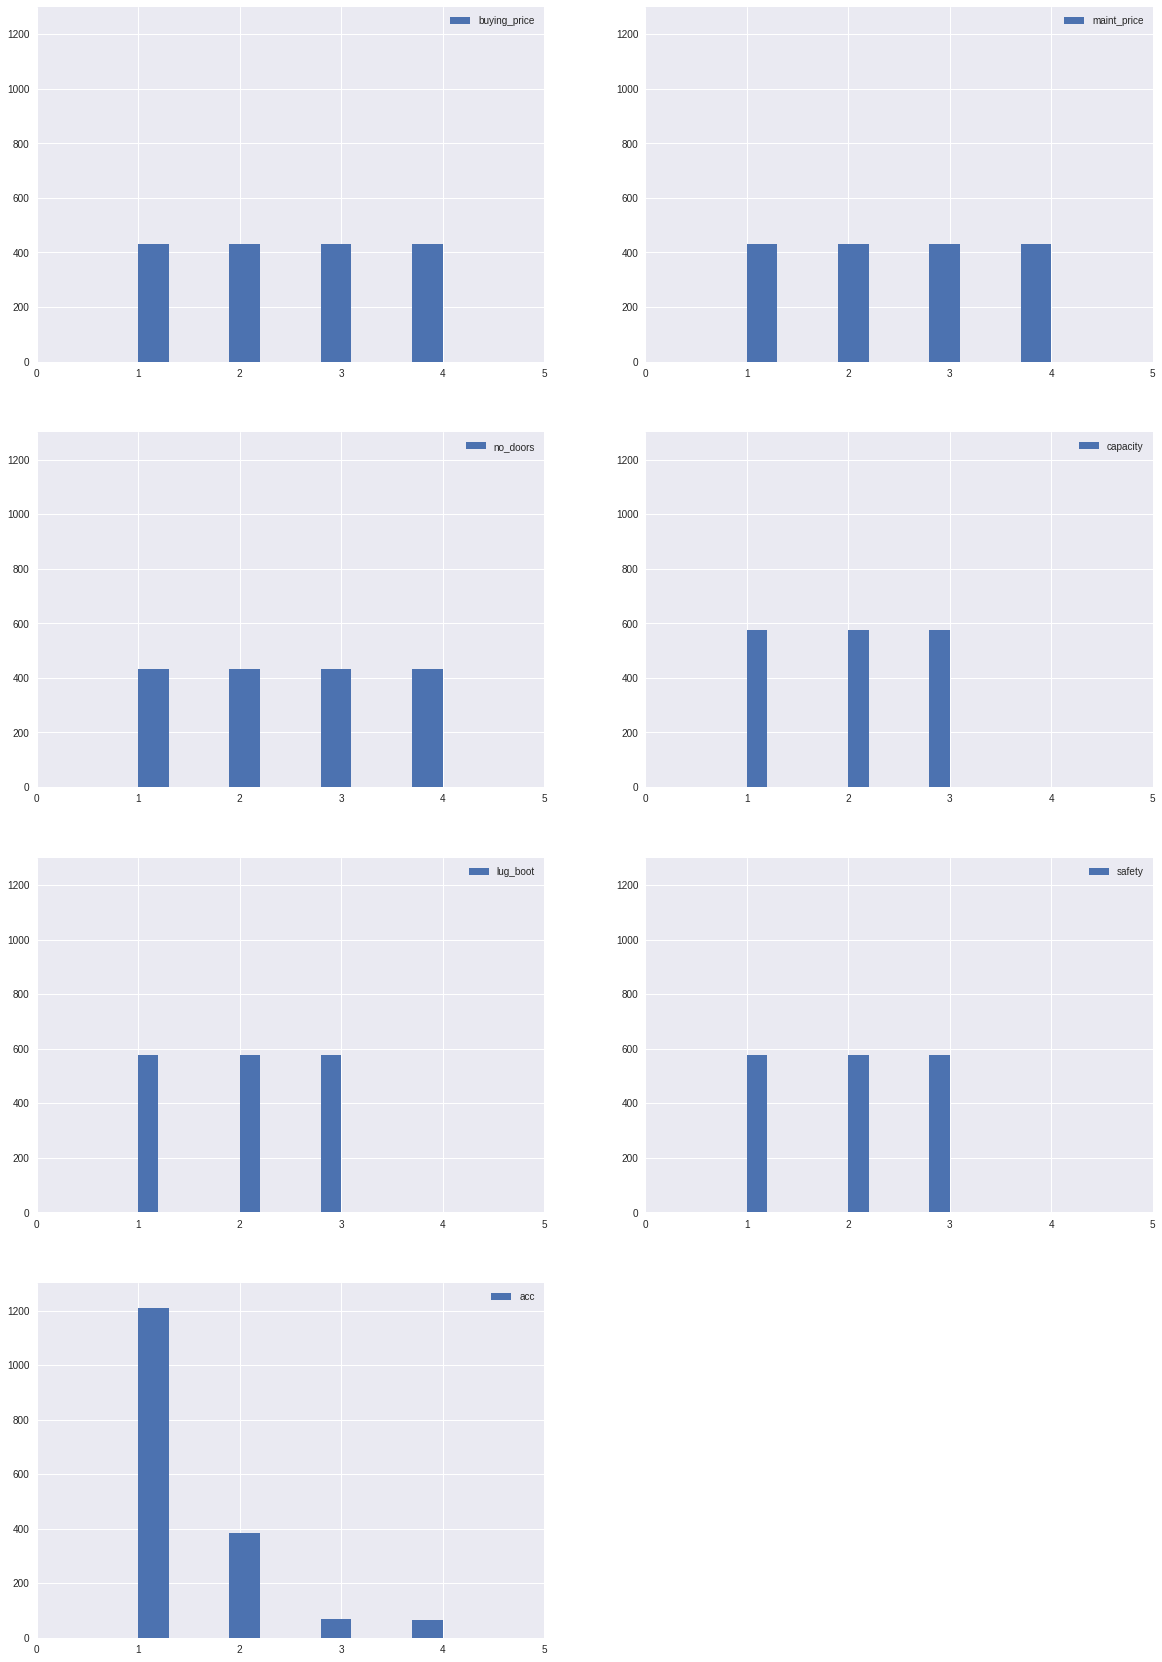

In [38]:
fig = plt.figure(figsize = (20,30))
for i, col in enumerate(feature_names):
    fig.add_subplot(4,2,1+i)
    plt.hist(car[col], label = col)
    plt.legend()
    plt.xlim(0,5)
    plt.ylim(0,1300)

In [16]:
feature_names

array(['buying_price', 'maint_price', 'no_doors', 'capacity', 'lug_boot',
       'safety', 'acc'], 
      dtype='<U12')

# Testing Accuracy and MSE Using Logistic and Linear Models

In [49]:
from sklearn.preprocessing import LabelEncoder

#Recreate car dataset in order to retain all features
car_df = pd.read_csv("car.data.txt", names = feature_names)
car_df.head()

encoder = LabelEncoder()

for i in car_df.columns:
    car_df[i] = encoder.fit_transform(car_df[i])

car_df.head()

,buying_price,maint_price,no_doors,capacity,lug_boot,safety,acc
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [104]:
def accuracy(actual, prediction):
     return 1-sum(np.abs(actual-prediction)) / (len(actual))
    
def MSE(actual, prediction):
    return sum((actual-prediction)**2) / len(actual)

In [100]:
-or-
from sklearn.metrics import mean_squared_error

In [108]:
target = np.array(car_df.acc)
feature = car_df.drop("acc", axis=1)

(feature_train,
 feature_test,
 target_train,
 target_test) = train_test_split(feature, target, random_state = 20)

linear_model = LinearRegression()
linear_model.fit(feature_train, target_train)
predictions = linear_model.predict(feature_test)

print("Linear Model: All features")
print("Accuracy: %f" %accuracy(target_test, predictions))
print("MSE: %f" %MSE(target_test, predictions))

Linear Model: All features
Accuracy: 0.343300
MSE: 0.735806


In [117]:
target = np.array(car_df.acc)
feature = car_df.drop("acc", axis=1)

(feature_train,
 feature_test,
 target_train,
 target_test) = train_test_split(feature, target, random_state = 20)

logistic_model = LogisticRegression()
logistic_model.fit(feature_train, target_train)
predictions = logistic_model.predict(feature_test)

print("Logisitc Model: All features")
print ("Accuracy function: %f" %accuracy(target_test, predictions))
print ("Accuracy from sklearn: %f" %accuracy_score(target_test, predictions))

Logisitc Model: All features
Accuracy function: 0.395833
Accuracy from sklearn: 0.678241


# Test on KMeans Using Bic and Silhouette Score

In [133]:
%ls -l cd Test

ls: cannot access 'cd': No such file or directory
Test:
total 196
-rw-r--r-- 1 samoht25 users   1809 May  6 07:29 bic.py
-rw-r--r-- 1 samoht25 users   8249 May  5 09:32 car_caret_testing.ipynb
-rw-r--r-- 1 samoht25 users 183832 May  6 07:42 python_car_testing.ipynb


In [135]:
from bic import BIC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [150]:
ks = range(2, 21)
kmeans_models = []

def fit_model(data):
    for k in ks:
        model = KMeans(n_clusters=k).fit(data)
        kmeans_models.append(model)
    return kmeans_models

result = fit_model(car_df)

In [156]:
def result_df(result, data):
    df = pd.DataFrame(result, columns = ["model"])
    df["k"] = df.model.apply(lambda x: x.n_clusters)
    df["bic"] = df.model.apply(lambda x: BIC(x, data))
    df["sil"] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index("k", inplace=True)
    return df

In [162]:
result_df(result, car_df).sort("bic").head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,model,bic,sil
k,,,
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",32626.563513,0.164183
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",32633.786299,0.175649
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",32646.747760,0.169387
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",32652.659579,0.177372
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",32653.622014,0.166099


In [163]:
result_df(result, car_df).sort("sil", ascending = False).head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,model,bic,sil
k,,,
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",32652.659579,0.177372
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",32633.786299,0.175649
15,"KMeans(algorithm='auto', copy_x=True, init='k-...",32666.973881,0.171766
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",32658.982511,0.170589
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",32646.747760,0.169387


In [168]:
features_df = result_df(result, car_df)

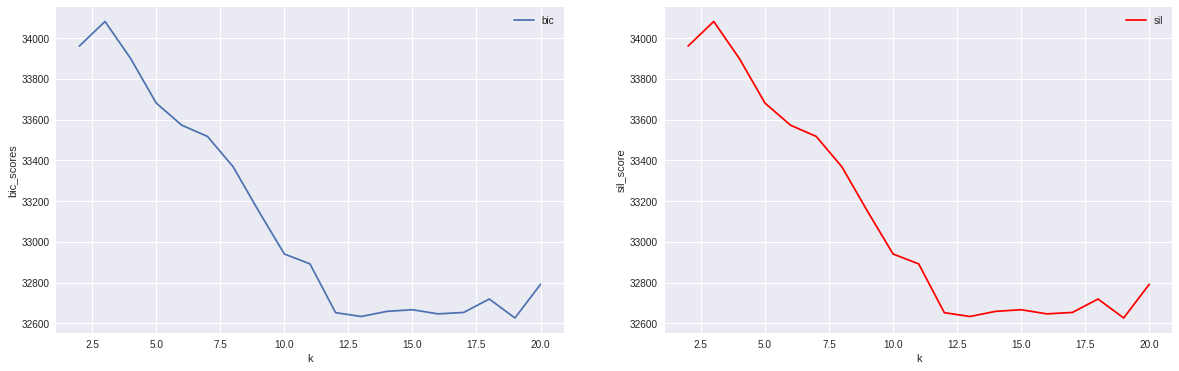

In [175]:
_, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].plot(features_df.index, features_df.bic.values, label = "bic")
ax[0].set_xlabel("k")
ax[0].set_ylabel("bic_scores")
ax[0].legend()
ax[1].plot(features_df.index, features_df.bic.values, label = "sil", color = "red")
ax[1].set_xlabel("k")
ax[1].set_ylabel("sil_score")
ax[1].legend()